In [ ]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 700)

In [ ]:
g_data = pd.read_pickle('./data_max_6months')
print(len(g_data))
display(g_data.head())

In [ ]:
corr_matrix = g_data[['TDS', 'true_SOD_G_head', 'true_SOD_G_torso', 'true_SOD_G_limbs','age_at_death', 'BMI', 
                      'temp_1_3_mean', 'hum_1_3_mean', 'temp_4_7_mean',
           'hum_4_7_mean', 'temp_8_21_mean', 'hum_8_21_mean']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
g_data['temp_1_21_mean'] = (g_data['temp_1_3_mean'] + g_data['temp_4_7_mean'] + g_data['temp_8_21_mean'])/3.0
g_data['hum_1_21_mean'] = (g_data['hum_1_3_mean'] + g_data['hum_4_7_mean'] + g_data['hum_8_21_mean'])/3.0
g_data.describe()

In [ ]:
# create y dataframes
y_pmi = g_data['log_PMI_days'].copy()
display(y_pmi.head(2))
print(y_pmi.shape)

y_add = g_data['log_ADD_thres0'].copy()
display(y_add.head(2))
print(y_add.shape)

In [ ]:
def standardize_X(X, col_names_ls):
    # standardize numeric features
    X_stand = X.copy()

    # apply standardization
    for i in col_names_ls:
    
        # fit on training data column
        scale = StandardScaler().fit(X_stand[[i]])
    
        # transform the training data column
        X_stand[i] = scale.transform(X_stand[[i]])
        
    return X_stand

In [163]:
def fit_model(X, y):
    X = sm.add_constant(X) 
    est = sm.OLS(y, X).fit() 
    print(est.summary())
    
    y_pred = est.predict(X)
    rmse = mean_squared_error(y, y_pred, squared = False)
    print('RMSE:', rmse)
    
    y_pred_unlogged = np.exp(y_pred).copy()
    y_unlogged = np.exp(y-1).copy()
    rmse_unlogged = mean_squared_error(y_unlogged, y_pred_unlogged, squared = False)
    print('RMSE (unlogged):', rmse_unlogged)
    
    fig = plt.figure(figsize=(5, 5)) 
    residuals = y - y_pred
    plt.hist(residuals)
    #fig = sm.graphics.plot_regress_exog(est, 'TDS', fig=fig) 
    plt.show()
    
    fig = plt.figure(figsize=(5, 5)) 
    plt.scatter(y_pred, residuals)
    plt.title('Fitted vs. Resisual Plot')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()
    
    fig = plt.figure(figsize=(5, 5)) 
    plt.scatter(y, y_pred)
    plt.title('Actual vs. Predicted')
    plt.axline((3, 3), slope=1, color='r', linestyle='--')
    #fig = sm.graphics.plot_regress_exog(est, 'TDS', fig=fig) 
    plt.show()

## TDS

In [ ]:
X1 = g_data[['TDS']]

pmi1 = fit_model(X1, y_pmi)
print('############################################################################################')
add1 = fit_model(X1, y_add)

## Weighted SODs

In [ ]:
X2 = g_data[['true_SOD_G_head', 'true_SOD_G_torso', 'true_SOD_G_limbs']]

pmi2 = fit_model(X2, y_pmi)
print('############################################################################################')
add2 = fit_model(X2, y_add)

## TDS + demographics (BMI, age, sex)

In [ ]:
X3 = g_data[['TDS', 'BMI', 'age_at_death', 'sex_male']]
X3_stand = standardize_X(X3, ['TDS', 'BMI', 'age_at_death'])
#display(X3_stand.describe())

pmi3 = fit_model(X3_stand, y_pmi)
print('############################################################################################')
add3 = fit_model(X3_stand, y_add)

## TDS + demographics (BMI, age, sex) + weather related

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     18.01
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           8.02e-22
Time:                        14:40:43   Log-Likelihood:                -243.43
No. Observations:                 213   AIC:                             506.9
Df Residuals:                     203   BIC:                             540.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.9343      0.192     20.

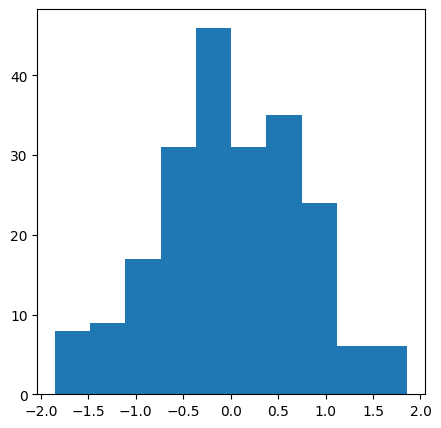

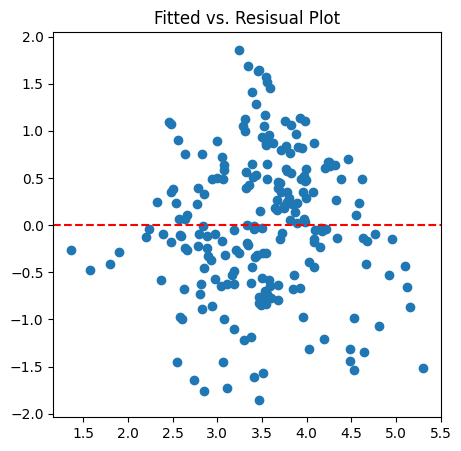

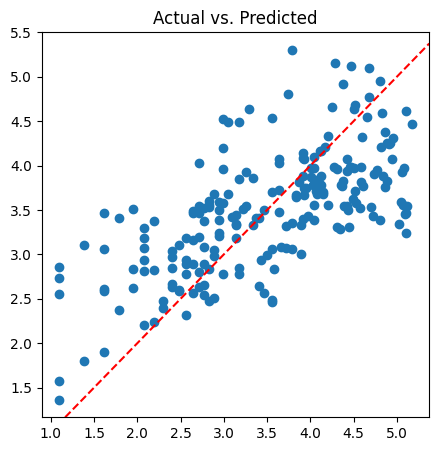

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     35.71
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.65e-37
Time:                        14:40:44   Log-Likelihood:                -220.97
No. Observations:                 213   AIC:                             461.9
Df Residuals:                     203   BIC:                             495.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

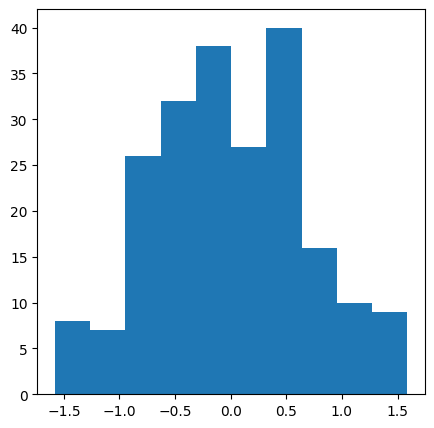

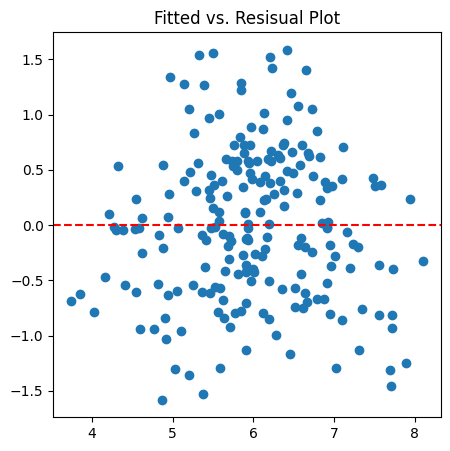

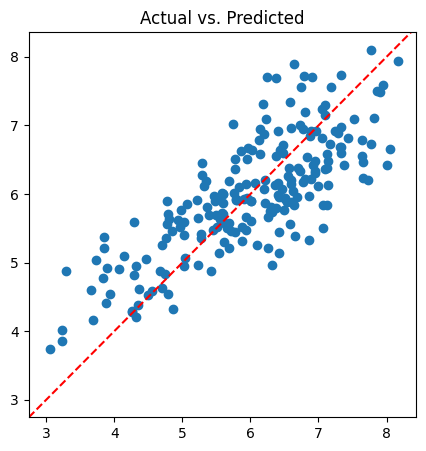

In [164]:
X4 = g_data[['TDS', 'BMI', 'age_at_death', 'sex_male',
            'fall', 'spring', 'summer','temp_1_21_mean', 'hum_1_21_mean']]
X4_stand = standardize_X(X4, ['TDS', 'BMI', 'age_at_death','temp_1_21_mean', 'hum_1_21_mean'])
#display(X4_stand.describe())

pmi4 = fit_model(X4_stand, y_pmi)
print('############################################################################################')
add4 = fit_model(X4_stand, y_add)